In [1]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
x


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
import numpy as np
import pandas as pd
print('No of samples=',x.shape[0])
print('No of features=',x.shape[1])
print('classes=',np.unique(y))
pd.DataFrame(y).value_counts()

No of samples= 178
No of features= 13
classes= [0 1 2]


1    71
0    59
2    48
dtype: int64

<AxesSubplot:xlabel='0', ylabel='count'>

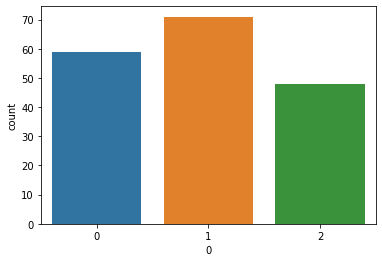

In [19]:
import seaborn as sns
sns.countplot(data=pd.DataFrame(y),x=0)

In [20]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [31]:
#train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=0) #random state can be None or any non zero    
x_test.shape

(54, 13)

In [61]:
#M1. Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [62]:
##m2. Normalization
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

In [63]:
from sklearn.linear_model import Perceptron
clf=Perceptron()

In [64]:
clf.fit(x_train,y_train)
#y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
#train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
#print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

Testing Acc= 0.5740740740740741


In [66]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
#y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
#train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
#print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)


Testing Acc= 0.9444444444444444


E:\Documents\OSLAB\anacondqa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)


Testing Acc= 0.7222222222222222


In [68]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)


Testing Acc= 0.9259259259259259


In [69]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)

Testing Acc= 0.9444444444444444


In [70]:
from sklearn.svm import SVC
clf= SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)

Testing Acc= 0.7777777777777778


In [76]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
clf1=SVC()
clf2=GaussianNB()
clf3=KNeighborsClassifier()
clf4=DecisionTreeClassifier()
clf5=LogisticRegression()
clf6=Perceptron()
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['SVC','GNB','KNN','DT','LR','PERC']
acc={}
t={}
import time
for classifier,name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train_mms,y_train)
    y_pred=classifier.predict(x_test_mms)
    et=time.time()
    acc[name]=accuracy_score(y_pred,y_test)
    t[name]=et-st
print(acc)
print(t)

{'SVC': 1.0, 'GNB': 0.9444444444444444, 'KNN': 1.0, 'DT': 0.9444444444444444, 'LR': 1.0, 'PERC': 1.0}
{'SVC': 0.007995843887329102, 'GNB': 0.007996559143066406, 'KNN': 0.008001089096069336, 'DT': 0.0, 'LR': 0.031995296478271484, 'PERC': 0.0}


In [ ]:
import sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassfier
